# Приоритизация гипотез. Анализ A/B-теста

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

Прроект разделен на две части:

 1.  Приоритизация гипотез
 2. Анализ A/B-теста



## Часть 1. Приоритизация гипотез.

**Задача**

•	Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

•	Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Описание данных**

•	**Hypothesis** — краткое описание гипотезы;

•	**Reach** — охват пользователей по 10-балльной шкале;

•	**Impact** — влияние на пользователей по 10-балльной шкале;

•	**Confidence** — уверенность в гипотезе по 10-балльной шкале;

•	**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as st
import datetime as dt


In [2]:
data=pd.read_csv('hypothesis.csv')
pd.options.display.max_colwidth = 150
data.head(10)


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.columns = [x.lower() for x in data.columns] # привидение к нижнему регистру( для удобства написания в следуйщих этапах)

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [4]:
data['ICE']=round((data['impact']*data['confidence'])/data['efforts'],2)      
data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


*Применяя метод ICE приоритетные гипотезы под номером 8,0,7*

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['RICE']= (data['reach']*data['impact']* data['confidence'])/data['efforts']
data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


*Применяя метод RICE приоритетные гипотезы под номером 7,2,0,6*

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [6]:
data


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


#### Вывод
*В каждой из таблиц есть явные лидеры, при применении метода ICE это номера 8,0,7. После применения метода RICE лидеры меняются 7,2,0. При использовании метода RICE учитывается важный параметр REACH (скольких пользователей затронет изменение, которое вы хотите внести). Учитывая все шкалы таблицы приоритетной гипотезой, является 7, также можно протестировать гипотезу 2.*

## Часть 2.  Анализ A/B-теста

Задача
Проанализируйте A/B-тест:
1.	Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

2.	Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

3.	Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

4.	Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

5.	Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 
Сделайте выводы и предположения.

6.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

7.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

8.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

9.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

10.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

11.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

12.	Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

13.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

**Описание данных**

**Файл /datasets/orders.csv.**

•	**transactionId** — идентификатор заказа;

•	**visitorId** — идентификатор пользователя, совершившего заказ;

•	**date** — дата, когда был совершён заказ;

•	**revenue** — выручка заказа;

•	**group** — группа A/B-теста, в которую попал заказ.


**Файл /datasets/visitors.csv.**

•	**date** — дата;

•	**group** — группа A/B-теста;

•	**visitors** — количество пользователей в указанную дату в указанной группе A/B-теста;



#### Предобработка данных

In [7]:
orders= pd.read_csv('orders.csv')
visitors=pd.read_csv('visitors.csv')


In [8]:
#состав столбцов
def describe_cols(df):
    
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique(),df[col].isna().sum()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений', 3: 'Кол-во пропусков'}, axis=1)

display(describe_cols(orders))
describe_cols(visitors)

,Значения,тип данных,Кол-во уникальных значений,Кол-во пропусков
transactionId,"[3667963787, 2804400009, 2961555356, 3797467345, 2282983706, 182168103, 398296753, 2626614568, 1576988021, 1506739906, 3649131742, 1919444843, 280...",int64,1197,0
visitorId,"[3312258926, 3642806036, 4069496402, 1196621759, 2322279887, 935554773, 2900797465, 78758296, 295230930, 1882260405, 879864040, 927791387, 3213223...",int64,1031,0
revenue,"[1650, 730, 400, 9759, 2308, 2210, 1860, 1044, 13710, 1855, 4008, 4499, 7370, 11985, 10980, 15277, 1060, 990, 16490, 1190, 300, 1050, 632, 15185, ...",int64,713,0
date,"[2019-08-15, 2019-08-16, 2019-08-01, 2019-08-22, 2019-08-17, 2019-08-23, 2019-08-02, 2019-08-18, 2019-08-24, 2019-08-03, 2019-08-25, 2019-08-28, 2...",object,31,0
group,"[B, A]",object,2,0


,Значения,тип данных,Кол-во уникальных значений,Кол-во пропусков
visitors,"[719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748, 735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722, 711, 594, 577, ...",int64,58,0
date,"[2019-08-01, 2019-08-02, 2019-08-03, 2019-08-04, 2019-08-05, 2019-08-06, 2019-08-07, 2019-08-08, 2019-08-09, 2019-08-10, 2019-08-11, 2019-08-12, 2...",object,31,0
group,"[A, B]",object,2,0


In [9]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))        #  преобразования типа данных
display(orders['date'].describe(datetime_is_numeric=True))

visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(visitors['date'].describe(datetime_is_numeric=True))

count                             1197
mean     2019-08-15 13:06:46.015037696
min                2019-08-01 00:00:00
25%                2019-08-08 00:00:00
50%                2019-08-15 00:00:00
75%                2019-08-23 00:00:00
max                2019-08-31 00:00:00
Name: date, dtype: object

count                     62
mean     2019-08-16 00:00:00
min      2019-08-01 00:00:00
25%      2019-08-08 06:00:00
50%      2019-08-16 00:00:00
75%      2019-08-23 18:00:00
max      2019-08-31 00:00:00
Name: date, dtype: object

In [10]:
print(orders.duplicated().sum()) # проверка на дубликаты
print(visitors.duplicated().sum())

0
0


In [11]:
orders.groupby('group')['visitorId'].nunique()  #  распределение по группам

group
A    503
B    586
Name: visitorId, dtype: int64

#### Вывод
* Провели проверку данных на пропуски и дубликаты. 
* Пропусков нет, дубликатов нет.  
* Поменяли тип данных в обеих таблицах в столбце date. 
* Проверили распределение по группам, всего у нас 2 группы: в группе В больше участников чем в группе А. Такое распределение допустимо. Данные готовы для дальнейшего анализа.  


**Проводится парное тестирование (тестируем одну гипотезу на двух группах)**

In [12]:
display(orders['date'].min(),orders['date'].max())
display(visitors['date'].min(),visitors['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

** Так как ТЗ нет временных указаний. Посмотрев обе таблицы, определим что проведение теста ограниченно 1 месяцем: с 1 по 31 августа 2009 года.**

In [13]:
# проверяем правильность разделения по группам
# отбираем группы из данных с заказами
# находим пользователей попавших в обе группы
a_group=orders.query('group=="A"')
b_group=orders.query('group=="B"')

group_new= list(np.intersect1d(a_group['visitorId'], b_group['visitorId']))
len(group_new)

58

**58 пользователей попали в обе группы. Такую ошибку должны были исключить еще на стадии подготовки к сбору данных для теста.  Наличие таких пользователей искажает вывод дальнейшего исследования. Для чистоты теста их нужно убрать.**

In [14]:
orders=orders.query('visitorId not in @group_new')

In [15]:
# проверили что данных  об этих пользователях больше нет.
a_group=orders.query('group=="A"')
b_group=orders.query('group=="B"')

group_new= list(np.intersect1d(a_group['visitorId'], b_group['visitorId']))
len(group_new)

0

#### Построение графика кумулятивной выручки по группам.

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


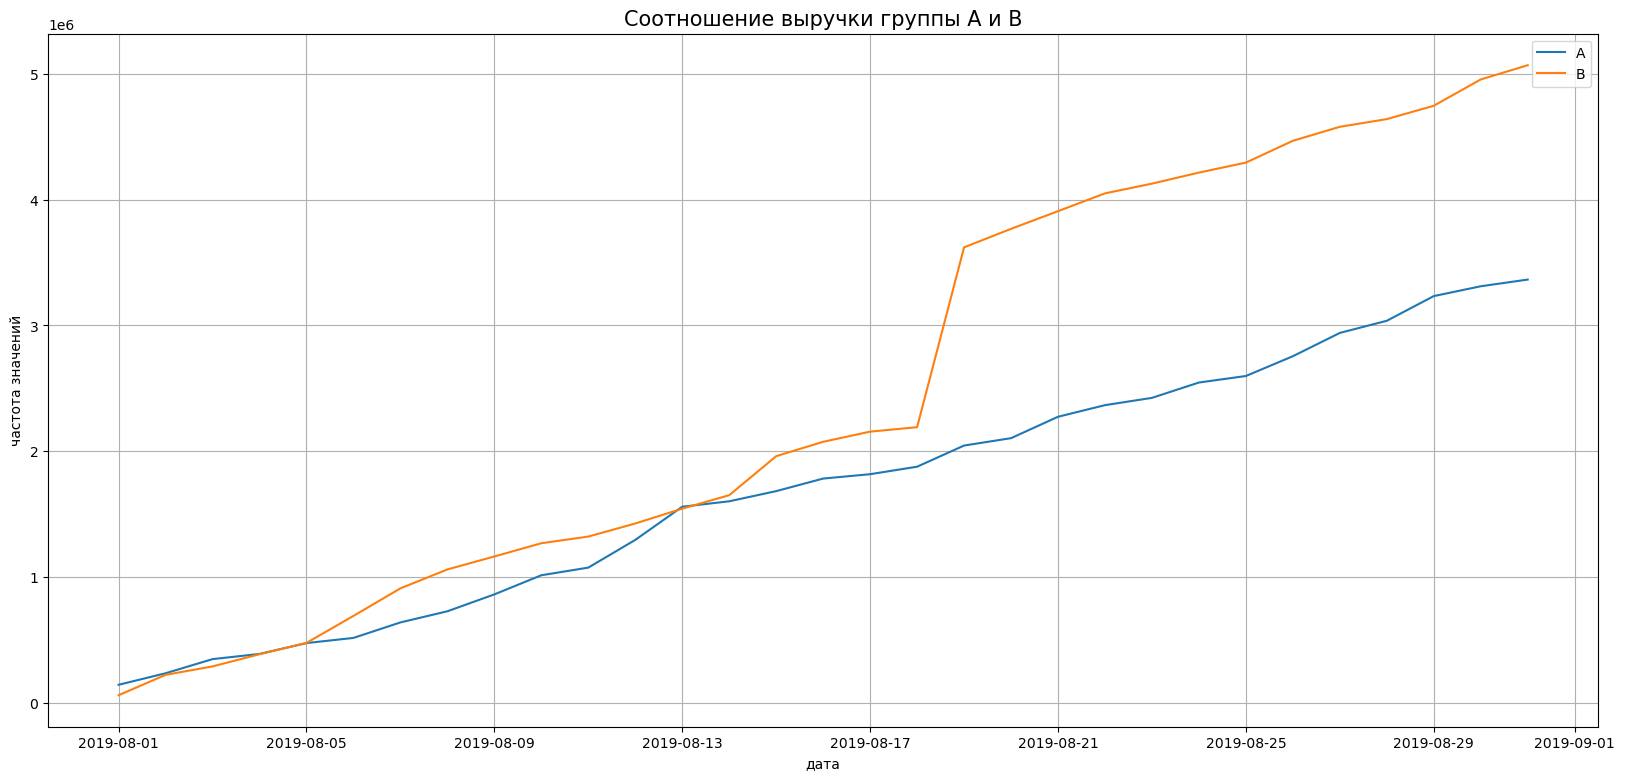

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(20,9))
plt.title('Соотношение выручки группы А и В', fontsize = 15)
plt.xlabel('дата')
plt.ylabel('частота значений')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.show()

#### Вывод
*В начале месяца видно, что выручка в группе В растет быстрее чем в А. 13 августа выручки примерно равны, после 13 августа выручка  группы В продолжает рост, примерно 19 числа происходит всплеск выручки и продолжается рост.( причина всплеска может быть несколько заказав( или один) на очень большие сумму) если не учитывать всплеск 19 числа можно предположить что выручки росли приблизительно одинаково, в группе В рост выручки незначительно больше. В дальнейшем исследование проанализируем аномальные значения.*

#### Построение графика кумулятивного среднего чека по группам.

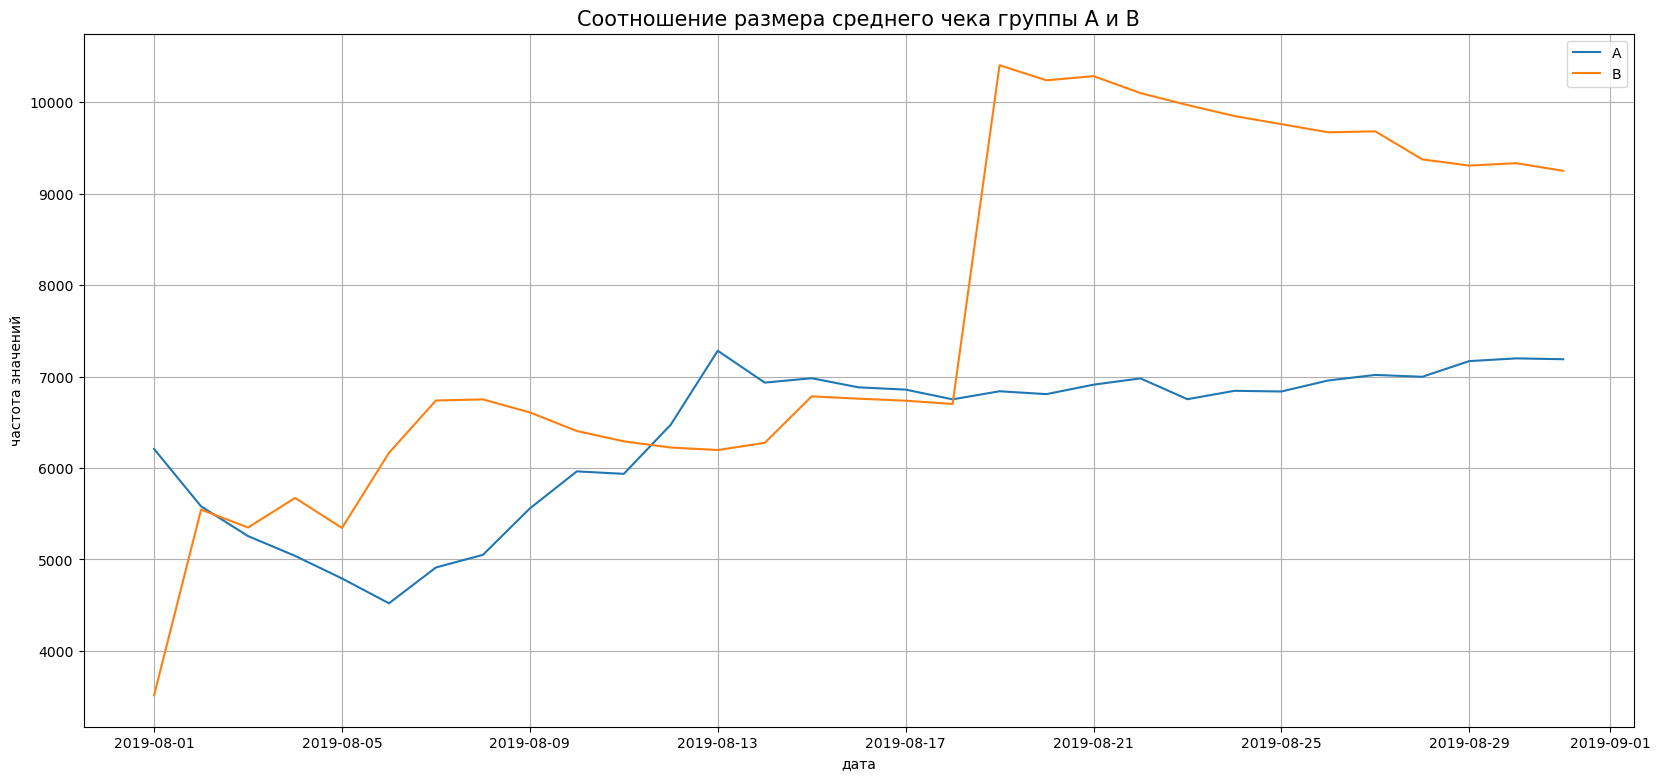

In [18]:
plt.figure(figsize=(20,9))
plt.title('Соотношение размера среднего чека группы А и В', fontsize = 15)
plt.xlabel('дата')
plt.ylabel('частота значений')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.grid()
plt.legend()
plt.show()

#### Вывод
*Средний чек группы В  в основном больше, чем у группы А, но 13 числа все наоборот, стоит обратить внимание что как и на предыдущем графике у группы В скачек 19 числа, что подтверждает наше предположение, после 19 числа средний чек начинает стремительно падать, в то время как в группе А наоборот  с 13 числа показатель практически стабилен, с легкими колебаниями.*

#### 	Построение графика относительного изменения кумулятивного среднего чека группы B к группе A. 

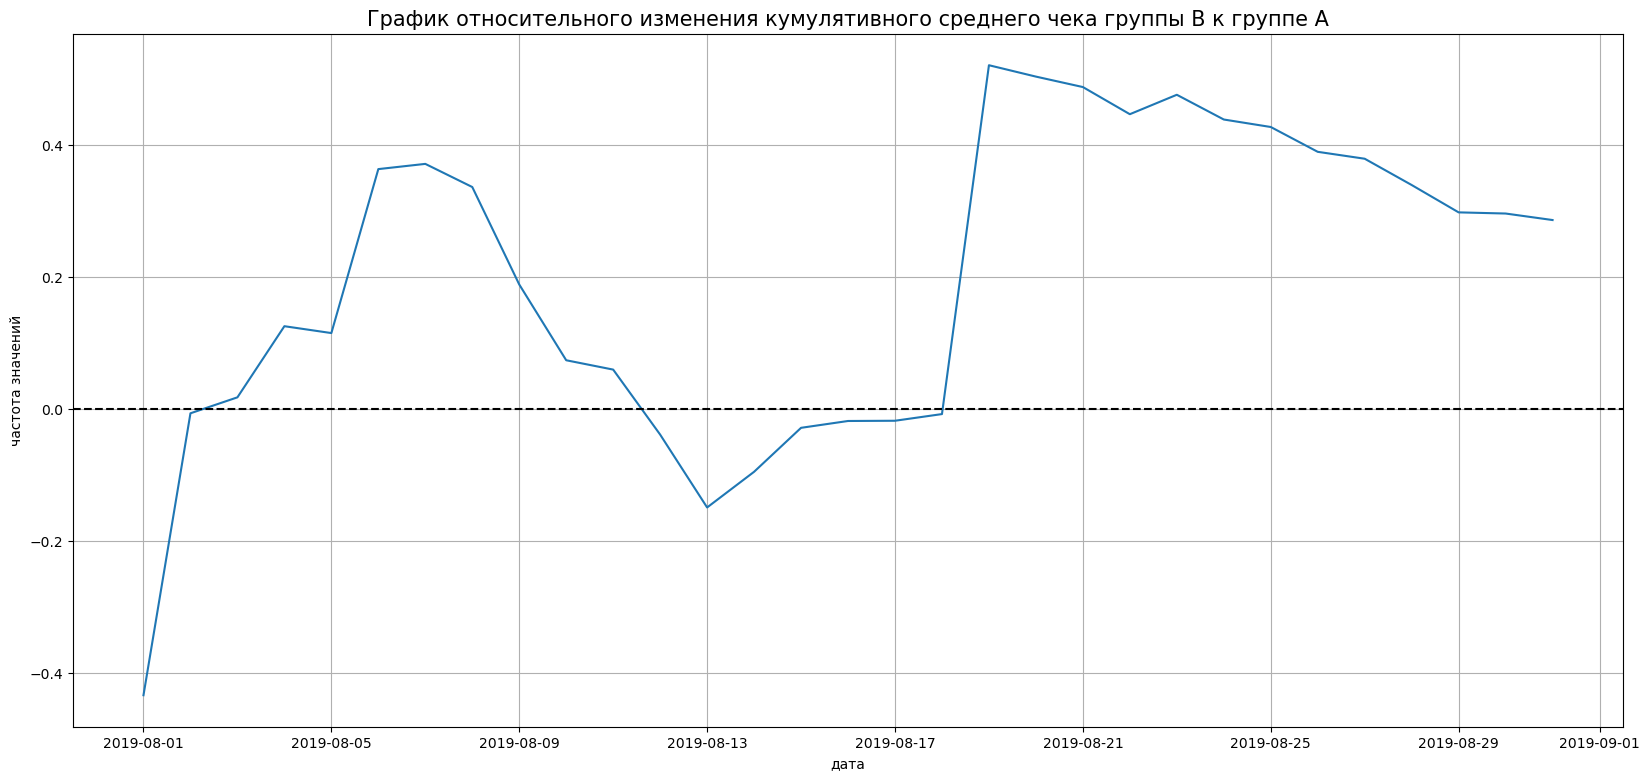

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20,9))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize = 15)
plt.xlabel('дата')
plt.ylabel('частота значений')
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.grid()
plt.show()

#### Вывод
*Средний чек набирает рост с начала месяца и рос до 7 числа. После началось снижение и 13 числу средний чек стал значительно меньше, чем в группе А, так же наблюдается всплеск 19 числа, в последующие дни началось постепенное снижение.*

#### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

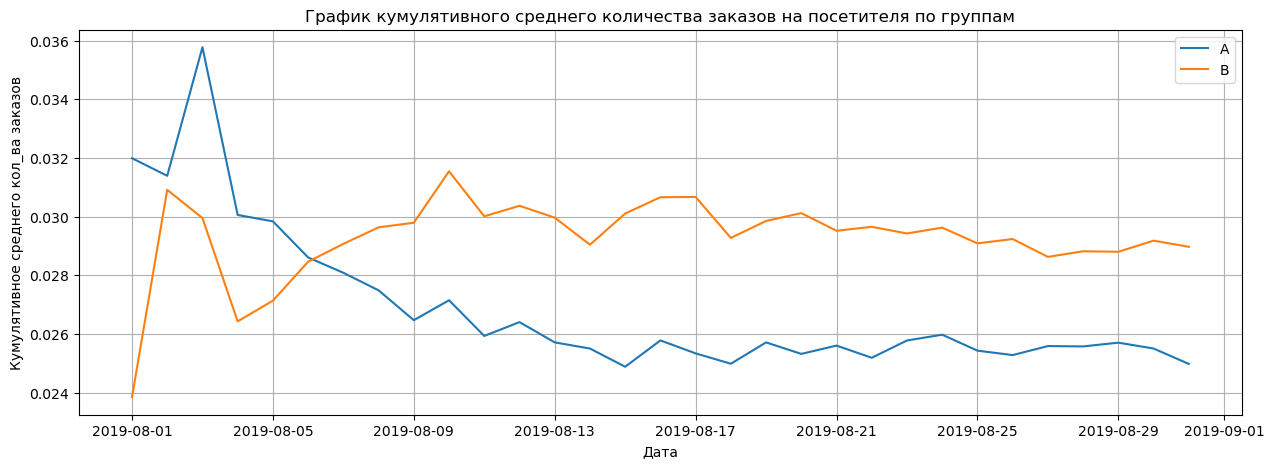

In [20]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднего кол_ва заказов')
plt.legend()
plt.show()
# задаем масштаб осей
#plt.axis(["2019-08-01", '2019-01-31', 0, 0.038])

#### Вывод
 *До 4 августа показатели группы В был значительно хуже, после начался рост, а группы А наоборот снижение. В целом метрика группы В стабильно лучше чем А.*

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

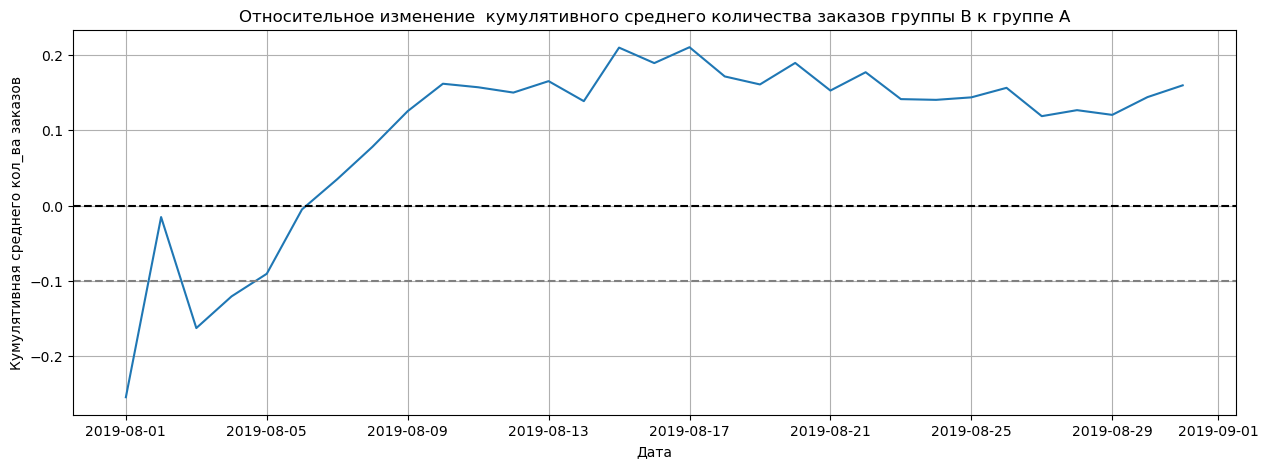

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение  кумулятивного среднего количества заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная среднего кол_ва заказов')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
 
plt.show()

#### Вывод
*С начала месяца показатель группы В стабильно меньше, чем А, но с 5 августа показатель увеличивался и стабильно рос, поднявшись к 21%, начинает немного снижаться и стабилизироваться. С 17 августа наблюдается значительное снижение.*

#### Постройте точечный график количества заказов по пользователям.

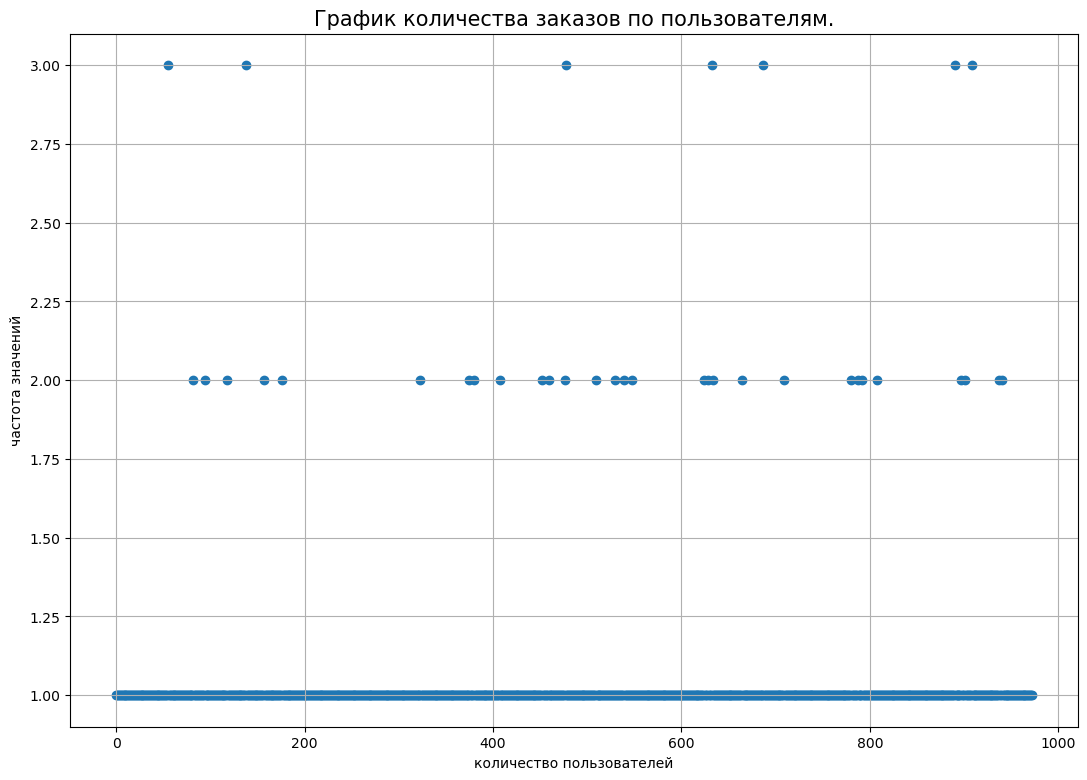

In [22]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(13,9))
plt.title('График количества заказов по пользователям.', fontsize = 15)
plt.xlabel('количество пользователей')
plt.ylabel('частота значений')

plt.scatter(x_values, ordersByUsers['orders'])
plt.grid()
plt.show()

#### Вывод
*По графику видно, что большая часть пользователей совершали по одному заказу. по 2 заказа не так много. Пользователей сделавших 3 и выше совсем мало, посчитаем перцентили (95.90) сейчас можно считать, что все что свыше 3 заказов это аномалия.*

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. 

In [23]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


#### Вывод
Будем орентироваться на  95 перцентиль, примим что все что выше 2 заказов -это аномалия.

#### Постройте точечный график стоимостей заказов. 

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
131      3163614039  2254586615 2019-08-22    53904     A


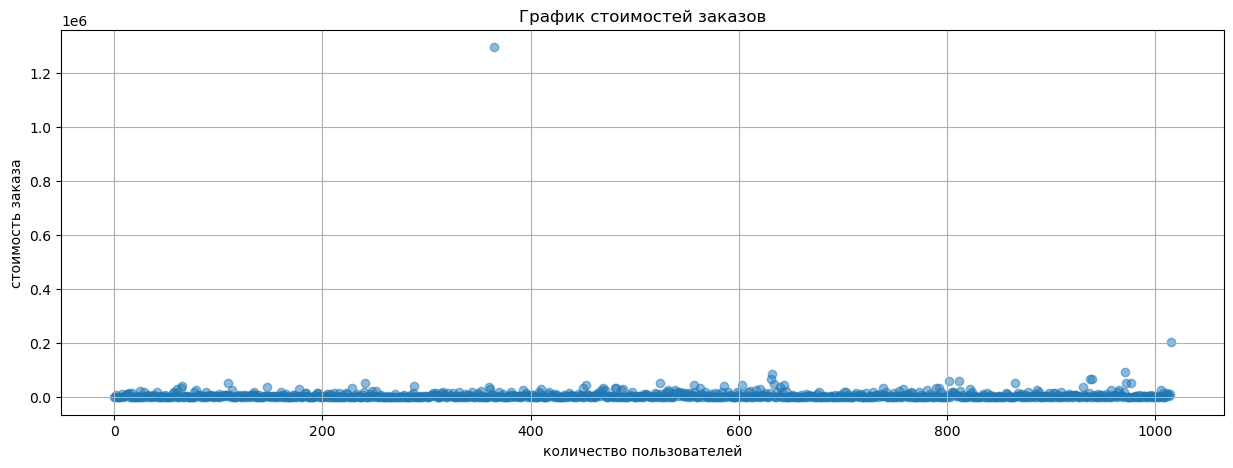

In [24]:
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel('количество пользователей')
plt.ylabel('стоимость заказа')
plt.scatter(x_values, orders['revenue'],alpha=0.5) 

plt.grid()
plt.show()

#### Вывод 
*На данном графике видно только два значительных вброса, для более точного исследования построим более наглядный график, уберем все значения больше 100000*

      transactionId   visitorId       date  revenue group
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A
949      1347999392   887908475 2019-08-21    60450     A
940      2420050534  4003628586 2019-08-08    58550     B
287       587872075  2254456485 2019-08-24    53904     A
613      4071177889  3931967268 2019-08-07    53904     B
131      3163614039  2254586615 2019-08-22    53904     A


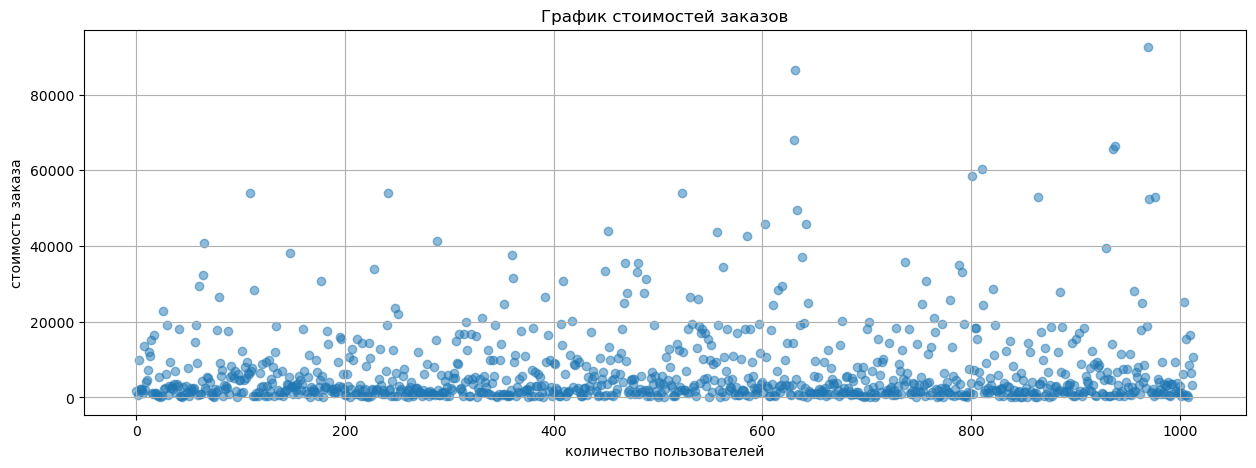

In [25]:
orders_new= orders[orders['revenue']<=100000]
print(orders_new.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0,len(orders_new['revenue'])))
plt.figure(figsize=(15,5))
plt.title('График стоимостей заказов')
plt.xlabel('количество пользователей')
plt.ylabel('стоимость заказа')
plt.scatter(x_values, orders_new['revenue'],alpha=0.5) 

plt.grid()
plt.show()

#### Вывод
*На графике хорошо видно, что большая часть заказов до 40 тысяч. на графике хорошо видны заказы свыше 80 тыс. Скорее всего это те самые заказы, которые вызывали скачки на предыдущих графиках. Что бы найти более точную границу аномальных заказов рассчитаем перцентили.*

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [26]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


#### Вывод 
Стоимость заказа свыше 53904 можно смело убирать и считать аномалиями.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


**Проверим гипотезу о нормальном распределении с помощью критерия Шапиро_Уилка**

In [28]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha=0.05
results = st.shapiro(sampleA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

results = st.shapiro(sampleB)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


C:\Users\alena\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Данные в обеих группах не подходят под нормальное распределение, используем U-критерием Манна — Уитни**

**Нулевая гипотеза H0:**"Статистически значимых различий среднего количества заказов на посетителя между группами нет"

**Альтернативная гипотеза H1:**"Тогда альтернативная гипотеза будет гласить - статистически значимые различия есть."


In [29]:
print('alpha=',0.05)
print("p-value= {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный показатель 'B' и 'A'= {0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


alpha= 0.05
p-value= 0.011
Относительный показатель 'B' и 'A'= 0.160


#### Вывод
**p-value = 0.011 меньше 0.05.** *Значит, нулевую гипотезу о том, что статистически значимых различий среднего количества заказов на посетителя между группами нет, - отвергаем. Это значит: по «сырым» данным различия среднего количества заказов на посетителя между группами A и B есть. А относительный выигрыш группы "B" над "A" равен 16% .*

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Нулевая гипотеза H0:**"Статистически значимых различий в средних чеках между группами нет"

**Альтернативная гипотеза H1:** "Статистически значимые различия есть.

In [30]:
print('alpha=',0.05)
print('p-value={0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный показатель 'B' и 'A'= {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

alpha= 0.05
p-value=0.829
Относительный показатель 'B' и 'A'= 0.287


**P-value значительно больше 0.05.** *Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A (на ~29% ).*

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Из предыдущих пунктов, мы приняли что аномальные пользователи - совершили 3 и более закзов или совершила заказ дороже 58233,2 рублей. Сделаем срезы и исключим этих пользователей**

In [31]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >  2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] >  2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] >  np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Всего аномальных пользователей =',abnormalUsers.shape[0])
print('Относительные потери', round(abnormalUsers.value_counts().count()/len(orders['visitorId'].unique()),3))

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitorId, dtype: int64
Всего аномальных пользователей = 16
Относительные потери 0.016


**Посмотрим как повлияет очистка данных на показатели**

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


**Нулевая гипотеза H0:**"Статистически значимых различий в среднем количестве заказов на посетителя между группами нет"

**Альтернативная гипотеза H1:**"Статистически значимые различия есть."

In [33]:
print('alpha=',0.05)
print('p-value={0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный показатель 'B' и 'A'= {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha= 0.05
p-value=0.007
Относительный показатель 'B' и 'A'= 0.189


#### Вывод 
**p-value меньше 0.05.** *Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет, - отвергаем. Это значит: и по «очищенным» данным различия среднем количестве заказов на посетителя между группами A и B есть. А относительный выигрыш группы "B" над "A" равен 18,9% (выше, чем с «сырыми» данными - 13.8%) .*

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Нулевая гипотеза H0:** "Статистически значимых различий в средних чеках между группами нет"

**Альтернативная гипотеза H1:** "Статистически значимые различия есть.

In [34]:
print('alpha =',0.05)
print(
    'p-value={0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель 'B' и 'A'={0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value=0.788
Относительный показатель 'B' и 'A'=-0.032


#### Вывод
***P-value значительно больше 0.05.** *Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, тоже нет (как и с "Сырыми" данными). А вот средний чек группы B оказался незначительно ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на ~29%, - и всё это из-за  аномальных заказов которые мы срезали*

#### 14.	Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

####  По результатам тестирования было выявленно.
• *Между сырыми и очищенными данными разница среднего кол-ва заказов на посетителя между группами есть. И по сырым (16) и по очищенным данным (18,9) в выигрыше находится группа В.*

• *Различия в средних чеках по сырым и по очищенным данным отсутствуют. По сырым данным средний чек группы В был больше, чем группы А, из-за аномальных заказов, после очистки чеки сравнялись.*

• **По результатам теста можно принять решение остановить тестирование и обозначить успех группы В:**
- *Группа В имеет лучший результат по среднему кол-ву заказов на посетителя, чем группа А.* 
- *По среднему чеку группы примерно равны.*
